<a href="https://colab.research.google.com/github/SohyunKimmm/SohyunKimmm/blob/main/230110_KOSIS%ED%86%B5%EA%B3%84%EC%9E%90%EB%A3%8C_%EB%AA%A8%EB%8D%B8%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#한글깨짐 보완
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,921 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [3]:
df = pd.read_excel("/content/drive/MyDrive/행정구역별_통계자료(2019,2020,2021).xlsx")
df.dropna(axis=0, inplace=True)

In [4]:
df.describe

<bound method NDFrame.describe of     행정구역별_ID    행정구역별     신혼부부_수  맞벌이_부부_수  평균_출생아_수  1인당_개인소득  1인당_지역총소득  \
0       11.0       전국  1101455.0  569472.0      0.80   22220.0    40571.0   
1       12.0    서울특별시   200477.0  118770.0      0.62   25256.0    54209.0   
2       13.0    부산광역시    62431.0   31683.0      0.79   21352.0    32014.0   
3       14.0    대구광역시    45094.0   22219.0      0.83   21046.0    29353.0   
4       15.0    인천광역시    65347.0   31551.0      0.81   21317.0    35818.0   
5       16.0    광주광역시    29596.0   15723.0      0.90   22472.0    32999.0   
6       17.0    대전광역시    30342.0   16157.0      0.82   22730.0    33810.0   
7       18.0    울산광역시    24721.0   11467.0      0.87   25165.0    59346.0   
8       19.0  세종특별자치시    11475.0    6905.0      0.82   22061.0    39730.0   
9       20.0      경기도   325067.0  168226.0      0.76   21937.0    41011.0   
10      21.0      강원도    31767.0   16088.0      0.89   21038.0    30858.0   
11      22.0     충청북도    34341.0   17441.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   행정구역별_ID     54 non-null     float64
 1   행정구역별        54 non-null     object 
 2   신혼부부_수       54 non-null     float64
 3   맞벌이_부부_수     54 non-null     float64
 4   평균_출생아_수     54 non-null     float64
 5   1인당_개인소득     54 non-null     float64
 6   1인당_지역총소득    54 non-null     float64
 7   1인당_민간소비지출액  54 non-null     float64
 8   총_가구         54 non-null     float64
 9   주택소유_가구      54 non-null     float64
 10  무주택_가구       54 non-null     float64
 11  연도           54 non-null     float64
dtypes: float64(11), object(1)
memory usage: 5.5+ KB


In [6]:
df.isnull().sum()

행정구역별_ID       0
행정구역별          0
신혼부부_수         0
맞벌이_부부_수       0
평균_출생아_수       0
1인당_개인소득       0
1인당_지역총소득      0
1인당_민간소비지출액    0
총_가구           0
주택소유_가구        0
무주택_가구         0
연도             0
dtype: int64

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1eed357670>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f1eed2a0310>, <matplotlib.lines.Line2D object at 0x7f1eed2a0670>], 'caps': [<matplotlib.lines.Line2D object at 0x7f1eed2a09d0>, <matplotlib.lines.Line2D object at 0x7f1eed2a0d30>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f1eed30bf70>], 'medians': [<matplotlib.lines.Line2D object at 0x7f1eed2ab0d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f1eed2ab3d0>], 'means': []})

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_

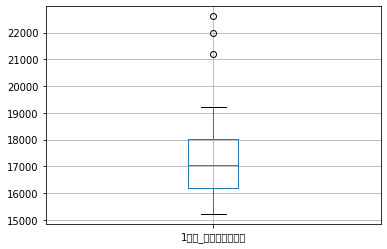

In [7]:
#이상치 찾기
df.boxplot(column="1인당_민간소비지출액", return_type="both")

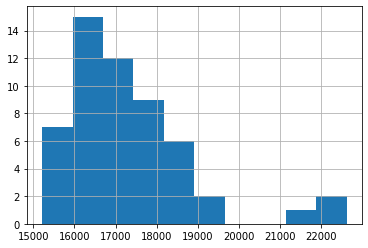

In [8]:
#히스토그램
df["1인당_민간소비지출액"].hist()

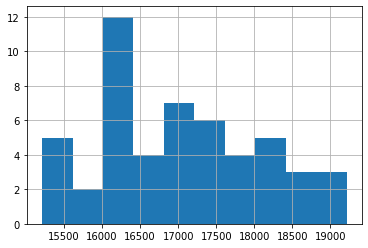

In [9]:
from scipy.sparse import data
#이상치 제거
q1 = df["1인당_민간소비지출액"].quantile(q=0.25)
q3 = df["1인당_민간소비지출액"].quantile(q=0.75)
IQR = q3 - q1

data_IQR = df[(df["1인당_민간소비지출액"] < q3 + IQR*1.5) & (df["1인당_민간소비지출액"] > q1 - IQR*1.5)] 
data_IQR["1인당_민간소비지출액"].hist()


In [10]:
#이상치 제거한 데이터값 df1에 넣기
df1 = data_IQR
df1

,행정구역별_ID,행정구역별,신혼부부_수,맞벌이_부부_수,평균_출생아_수,1인당_개인소득,1인당_지역총소득,1인당_민간소비지출액,총_가구,주택소유_가구,무주택_가구,연도
0,11.0,전국,1101455.0,569472.0,0.80,22220.0,40571.0,18435.0,21448463.0,12062871.0,9385592.0,2021.0
2,13.0,부산광역시,62431.0,31683.0,0.79,21352.0,32014.0,18693.0,1431365.0,822769.0,608596.0,2021.0
3,14.0,대구광역시,45094.0,22219.0,0.83,21046.0,29353.0,18378.0,1000931.0,579620.0,421311.0,2021.0
4,15.0,인천광역시,65347.0,31551.0,0.81,21317.0,35818.0,17170.0,1183610.0,677602.0,506008.0,2021.0
5,16.0,광주광역시,29596.0,15723.0,0.90,22472.0,32999.0,18829.0,615693.0,354979.0,260714.0,2021.0
6,17.0,대전광역시,30342.0,16157.0,0.82,22730.0,33810.0,19146.0,640085.0,338038.0,302047.0,2021.0
7,18.0,울산광역시,24721.0,11467.0,0.87,25165.0,59346.0,19211.0,451432.0,289774.0,161658.0,2021.0
8,19.0,세종특별자치시,11475.0,6905.0,0.82,22061.0,39730.0,17198.0,145295.0,77538.0,67757.0,2021.0
9,20.0,경기도,325067.0,168226.0,0.76,21937.0,41011.0,17743.0,5290662.0,2960542.0,2330120.0,2021.0
10,21.0,강원도,31767.0,16088.0,0.89,21038.0,30858.0,17077.0,674728.0,391373.0,283355.0,2021.0


In [11]:
df1.columns

Index(['행정구역별_ID', '행정구역별', '신혼부부_수', '맞벌이_부부_수', '평균_출생아_수', '1인당_개인소득',
       '1인당_지역총소득', '1인당_민간소비지출액', '총_가구', '주택소유_가구', '무주택_가구', '연도'],
      dtype='object')

In [12]:
#df1 = df1[['행정구역별', '신혼부부_수', '맞벌이_부부_수', '평균_출생아_수', '1인당_개인소득', '1인당_지역총소득', '1인당_민간소비지출액', '총_가구', '주택소유_가구', '무주택_가구', '연도']]

In [13]:
#모형기반 변수선택
#y -> numeric value

from sklearn.feature_selection import SelectKBest, chi2 

#데이터(변수) 지정
X = df1.drop(["행정구역별", "1인당_민간소비지출액"], axis=1) 
Y = df1["1인당_민간소비지출액"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#모형기반 변수선택

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector = SelectFromModel(RandomForestRegressor(n_estimators= 100, random_state= 0), threshold = "median") 

selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support()
score[score["support"] == True]

,attribute,support
0,행정구역별_ID,True
1,신혼부부_수,True
3,평균_출생아_수,True
4,1인당_개인소득,True
5,1인당_지역총소득,True


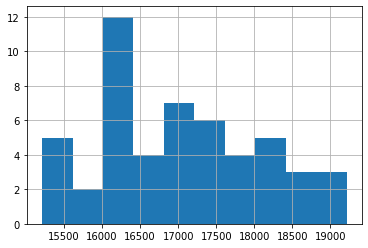

In [14]:
df1["1인당_민간소비지출액"].hist()

<ipython-input-15-04a7382a2d1e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["1인당_민간소비지출액"] = np.log1p(df1["1인당_민간소비지출액"])
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45

[[-3.17998188e-01  3.75876108e-01 -4.89308656e-02  3.06511449e-01
  -2.48207929e-01]
 [-3.63812972e-01  1.42832921e+00 -1.26086756e+00 -1.05145421e+00
  -3.35339948e-01]
 [-2.38886198e-01 -1.07124691e+00 -1.94279009e-01 -8.63680244e-01
  -1.96472499e-01]
 [-3.12120435e-01  7.70546021e-01 -1.39638539e+00 -1.08243582e-01
  -2.59394931e-01]
 [ 7.69235218e-01 -9.39690269e-01  6.54016490e-03  4.36594982e-01
   5.33058678e-01]
 [-2.51094419e-01  1.12762832e-01 -6.08676697e-02 -3.98096018e-01
  -2.01899270e-01]
 [-3.15553526e-01  6.38989383e-01 -6.59112201e-01 -4.76126134e-02
  -2.53378723e-01]
 [-3.62024746e-01  1.95455576e+00 -6.06449831e-01  3.91226775e-01
  -3.30505529e-01]
 [-4.23050762e-01  3.75876108e-01 -1.83746535e-01 -5.33780564e-01
  -4.32637557e-01]
 [-3.63601705e-01  5.07432745e-01 -1.09726313e+00 -8.98126476e-01
  -3.57077235e-01]
 [-2.44869584e-01 -6.76576994e-01 -2.99603750e-01 -4.32262198e-01
  -2.50175147e-01]
 [-4.21368171e-01  7.70546021e-01 -1.34934034e+00 -7.14273216e-01

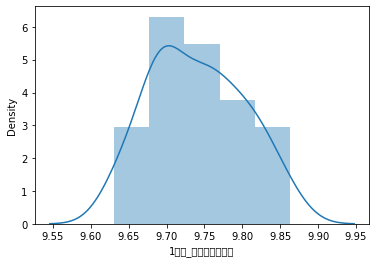

In [15]:
#선형 회귀분석

import seaborn as sns
import numpy as np

df1["1인당_민간소비지출액"] = np.log1p(df1["1인당_민간소비지출액"])
sns.distplot(df1["1인당_민간소비지출액"])

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num = ["맞벌이_부부_수", "평균_출생아_수", "1인당_개인소득", "1인당_지역총소득", "총_가구"]

X = df1[num]
Y = df1["1인당_민간소비지출액"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#스케일링
ct = ColumnTransformer([('scling', StandardScaler(), num)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from math import sqrt

lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train))) #train데이터로 부터 나온 Rsquare

rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE : {:.20f}".format(rmse))


predict value
 [9.72468069 9.74226588 9.75253078 9.79574352 9.7830999  9.71928711
 9.68168182 9.7236267  9.74546274 9.80514948 9.72901081 9.74641929
 9.72215814 9.74133291 9.73966153 9.79065716]
train R2 : 0.529
RMSE : 0.05403404524970922829


In [19]:
print("절편", np.round(lr.intercept_, 3)) 
print("가중치(beta)", np.round(lr.coef_, 3))

절편 9.747
가중치(beta) [-0.048 -0.013  0.043 -0.015  0.048]


In [20]:
#모델 적용
#1. KNeighborsRegressor

X = df1[["맞벌이_부부_수", "평균_출생아_수", "1인당_개인소득", "1인당_지역총소득", "총_가구"]]
Y = df1["1인당_민간소비지출액"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 0)

scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=9, p=2)


knn_reg.fit(X_train, Y_train)  
Y_pred = knn_reg.predict(X_test)
print("accuracy : {:.3f}".format(knn_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))

accuracy : 0.422
RMSE : 0.056


In [21]:
#2. 의사결정나무(DT)

X = df1[["맞벌이_부부_수", "평균_출생아_수", "1인당_개인소득", "1인당_지역총소득", "총_가구"]]
Y = df1["1인당_민간소비지출액"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 0)

scaler = StandardScaler().fit(X_train,Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.tree import DecisionTreeRegressor

DT_model_reg =  DecisionTreeRegressor(random_state=0, max_depth= 5)
DT_model_reg.fit(X_train, Y_train)
Y_pred = DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse : {:.3f}".format(rmse))

accuracy : 0.977
rmse : 0.046


In [23]:
#"1인당-민간소비지출액"에 가장 영향을 많이 미치는 요소 찾아보기
#'feature importance' -> 모델 내에서 Y에게 영향을 미치는 가중치가 제일 큰 X값 찾아보는 것

feature_name = X.columns
feature_importance = DT_model_reg.feature_importances_
sorted(zip(feature_importance, feature_name), reverse= True)

[(0.4595045248449475, '1인당_개인소득'),
 (0.1901310565066623, '1인당_지역총소득'),
 (0.1718812745440255, '총_가구'),
 (0.1451299653057381, '맞벌이_부부_수'),
 (0.03335317879862664, '평균_출생아_수')]

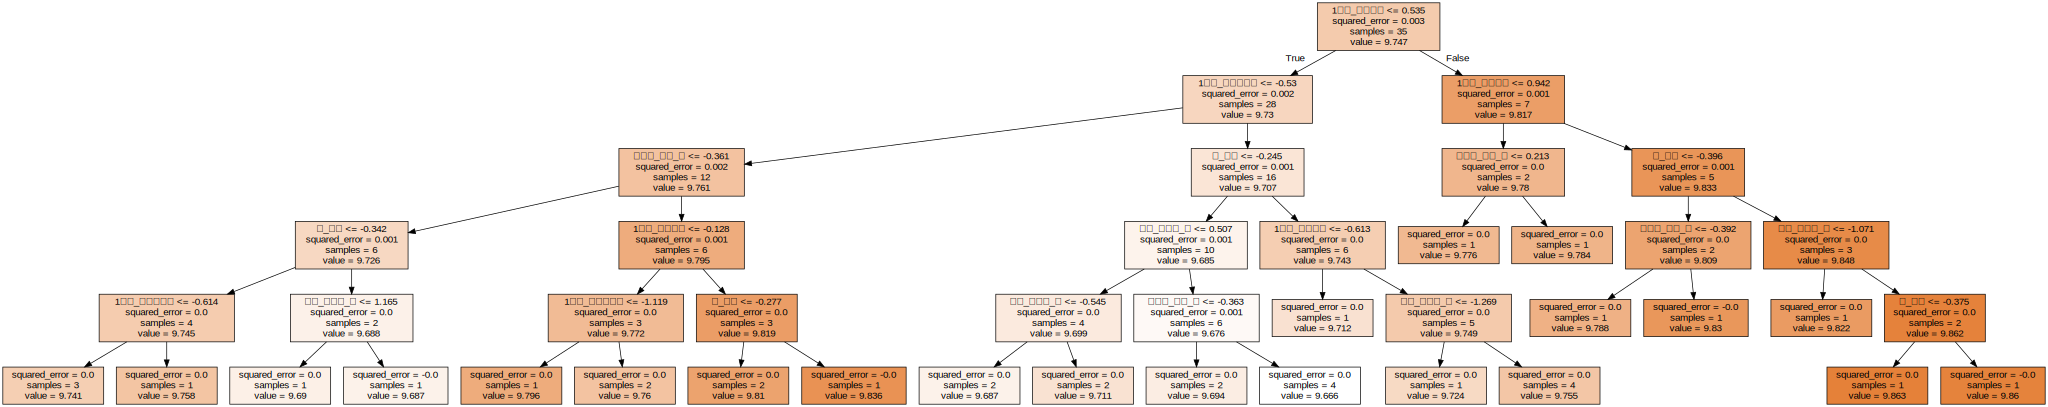

In [24]:
#DT 시각화

from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model_reg, out_file= "tree.dot", class_names=["비이탈", "이탈"], 
                feature_names = feature_name, impurity=True, filled=True)

#파일열기
with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [25]:
#3. SVM_SVR(Support Vector Regressor)

X = df1[["맞벌이_부부_수", "평균_출생아_수", "1인당_개인소득", "1인당_지역총소득", "총_가구"]]
Y = np.log1p(df1["1인당_민간소비지출액"])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 0)

scaler = StandardScaler().fit(X_train,Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.svm import SVR

SVR_model = SVR(C=1, kernel = "linear", epsilon= 0.1) 
SVR_model.fit(X_train, Y_train)
Y_pred = SVR_model.predict(X_test)
print("accuracy : {:.3f}".format(SVR_model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))
print(SVR_model.coef_)

accuracy : -0.012
RMSE : 0.007
[[0. 0. 0. 0. 0.]]


In [26]:
#4. 나이브 베이즈

X = df1[["맞벌이_부부_수", "평균_출생아_수", "1인당_개인소득", "1인당_지역총소득", "총_가구"]]
Y = df1["1인당_민간소비지출액"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 0)

from sklearn.linear_model import BayesianRidge

NB_model_reg = BayesianRidge(alpha_1 = 0.001, lambda_1 = 0.001)
NB_model_reg.fit(X_train, Y_train)
Y_pred = NB_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(NB_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse : {:.3f}".format(rmse))
print(NB_model_reg.coef_)

accuracy : 0.507
rmse : 0.054
[ 1.57203812e-07 -3.98874556e-06  3.78921438e-05 -3.24836203e-06
 -3.55599224e-09]


In [27]:
#모형 성능비교(KNN, DT, SVM, 나이브 베이즈)

X1 = df1[["맞벌이_부부_수", "평균_출생아_수", "1인당_개인소득", "1인당_지역총소득", "총_가구"]]
Y1 = df1["1인당_민간소비지출액"]

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 0)

#Column Transformer
ct = ColumnTransformer([("scaling", StandardScaler(), ["맞벌이_부부_수", "평균_출생아_수", "1인당_개인소득", "1인당_지역총소득", "총_가구"])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [28]:
lr_model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors=9, p=2)
dt_model =  DecisionTreeRegressor(random_state=0, max_depth= 5)
nb_model = BayesianRidge(alpha_1 = 0.001, lambda_1 = 0.001)

In [29]:
lr_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)
nb_model.fit(X_train, Y_train)

BayesianRidge(alpha_1=0.001, lambda_1=0.001)

In [30]:
lr_Y_pred = lr_model.predict(X_test)
knn_Y_pred = knn_model.predict(X_test)
dt_Y_pred = dt_model.predict(X_test)
nb_Y_pred = nb_model.predict(X_test)

In [31]:
#Training에 대한 accuracy
print("lr score : {:.3f}".format(lr_model.score(X_train, Y_train)))
print("knn score : {:.3f}".format(knn_model.score(X_train, Y_train)))
print("dt score : {:.3f}".format(dt_model.score(X_train, Y_train)))
print("nb score : {:.3f}".format(nb_model.score(X_train, Y_train)))

lr score : 0.529
knn score : 0.422
dt score : 0.977
nb score : 0.507


In [36]:
#예측(Prediction)에 대한 accuracy(RMSE)

lr = LinearRegression().fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("lr_RMSE : {:.5f}".format(rmse))

knn_reg.fit(X_train, Y_train)  
Y_pred = knn_reg.predict(X_test)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("knn_RMSE : {:.5f}".format(rmse))

DT_model_reg.fit(X_train, Y_train)
Y_pred = DT_model_reg.predict(X_test)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("dt_RMSE : {:.5f}".format(rmse))

NB_model_reg.fit(X_train, Y_train)
Y_pred = NB_model_reg.predict(X_test)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("nb_RMSE : {:.5f}".format(rmse))

lr_RMSE : 0.05403
knn_RMSE : 0.05554
dt_RMSE : 0.04601
nb_RMSE : 0.05562


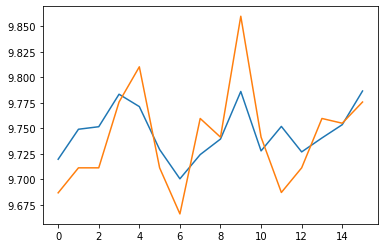

In [39]:
#DT모델로 test값, predict값 비교

dt_result = pd.DataFrame()
dt_result['test'] = Y_test
dt_result['pred'] = dt_Y_pred

import matplotlib.pyplot as plt

plt.plot(Y_pred)
plt.plot(dt_Y_pred)